In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import os
import datetime
from prophet import Prophet

In [4]:
df= pd.read_csv( "/content/Data Set Question 3.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882 entries, 0 to 5881
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5882 non-null   object 
 1   Price   5882 non-null   float64
 2   LAG1    5882 non-null   float64
 3   LAG2    5882 non-null   float64
 4   LAG3    5882 non-null   float64
 5   LAG4    5882 non-null   float64
 6   LAG5    5882 non-null   float64
 7   MA5     5882 non-null   float64
 8   MA10    5882 non-null   float64
 9   MA20    5882 non-null   float64
dtypes: float64(9), object(1)
memory usage: 459.7+ KB


In [5]:
df['DateTime']=pd.to_datetime(df['Date'])

In [6]:
df1 = df.dropna()
df1.shape

(5882, 11)

In [7]:
split_date ='2018-10-09'
df_training = df1.loc[df['DateTime'] <= split_date]
df_test = df1.loc[df['DateTime'] > split_date]

In [11]:
df_training = df_training.rename(columns={'DateTime': 'ds','Price': 'y'})

In [12]:
m = Prophet(growth='linear', interval_width=0.95)
m = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m.add_seasonality(name='daily', period=1, fourier_order=6)

In [13]:
m.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [14]:
forecast = m.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4249,2018-10-03,3.147623,2.309343,3.973615
4250,2018-10-04,3.140258,2.297620,4.028226
4251,2018-10-05,3.150891,2.299398,4.011356
4252,2018-10-08,3.192874,2.361522,4.009412
4253,2018-10-09,3.200445,2.401891,4.054958


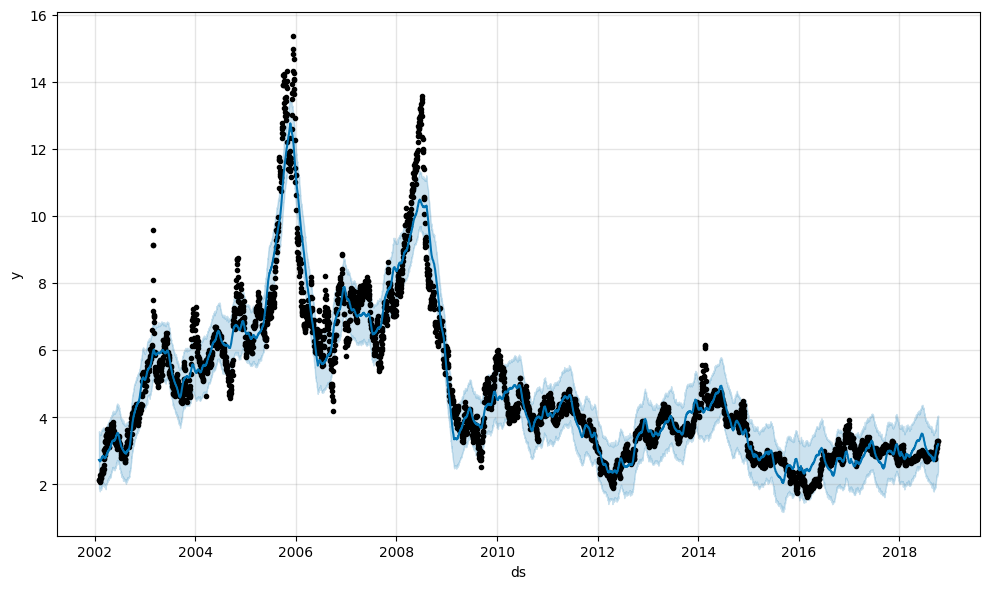

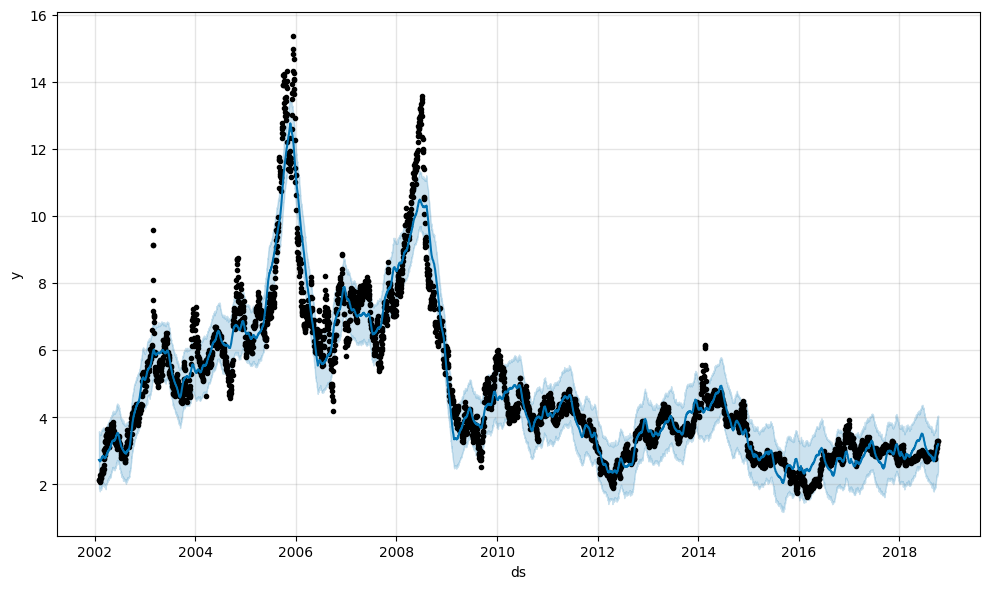

In [15]:
m.plot(forecast)

In [16]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.95941849


In [17]:
df_test = df_test.rename(columns={'Date': 'ds','Price': 'y'})

In [18]:
forecast2 = m.predict(df_test.drop(columns="y"))

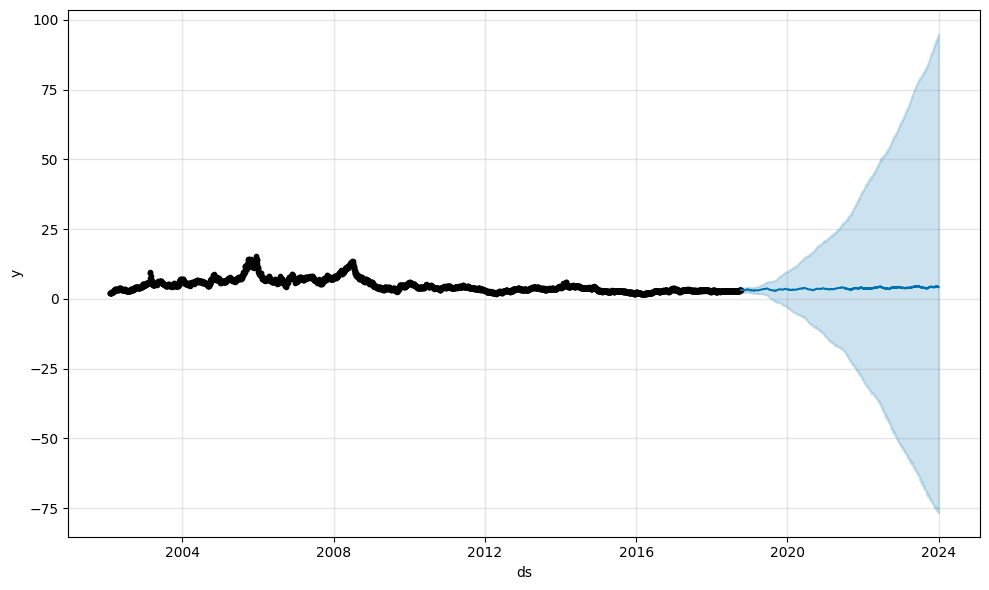

In [19]:
fig=m.plot(forecast2)

In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.38986484


In [21]:
df_training["add1"] = df1['LAG1']
df_training["add2"]= df1['LAG2']
df_training["add3"]= df1['LAG3']
df_training["add4"]=df1['LAG4']
df_training["add5"]=df1['LAG5']
df_training["add6"]= df1['MA5']
df_training["add7"]=df1['MA10']
df_training["add8"]=df1['MA20']

In [22]:
m2 = Prophet(growth='linear', interval_width=0.95)
m2 = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m2.add_seasonality(name='daily', period=1, fourier_order=6)
m2.add_regressor('add1')
m2.add_regressor('add2')
m2.add_regressor('add3')
m2.add_regressor('add4')
m2.add_regressor('add5')
m2.add_regressor('add6')
m2.add_regressor('add7')
m2.add_regressor('add8')

In [23]:
m2.fit(df_training)

INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [24]:
forecast = m2.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4249,2018-10-03,3.280451,3.021735,3.532491
4250,2018-10-04,3.300192,3.042952,3.527639
4251,2018-10-05,3.245939,3.014867,3.477212
4252,2018-10-08,3.205388,2.963743,3.441849
4253,2018-10-09,3.310809,3.074079,3.562488


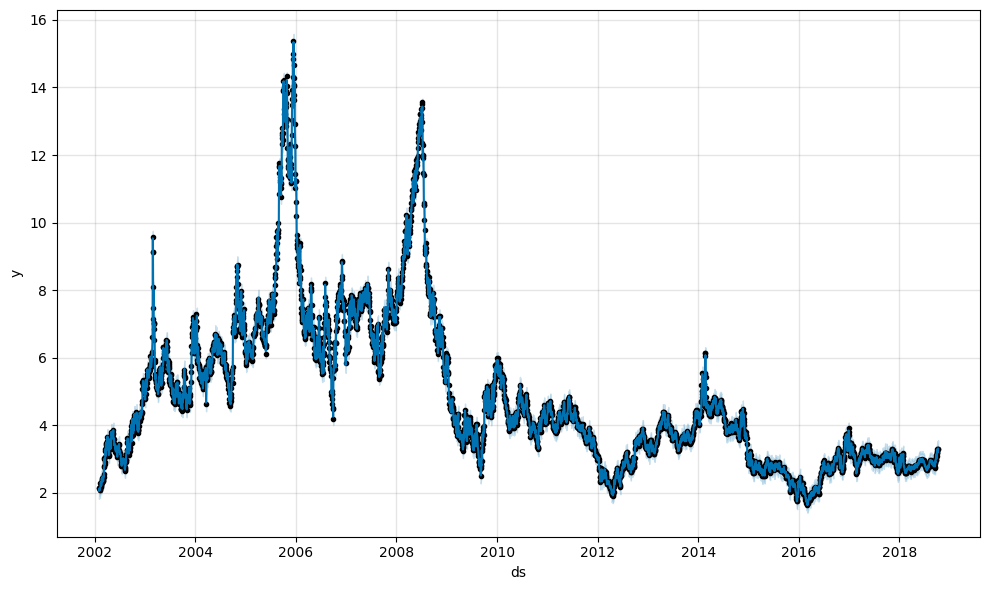

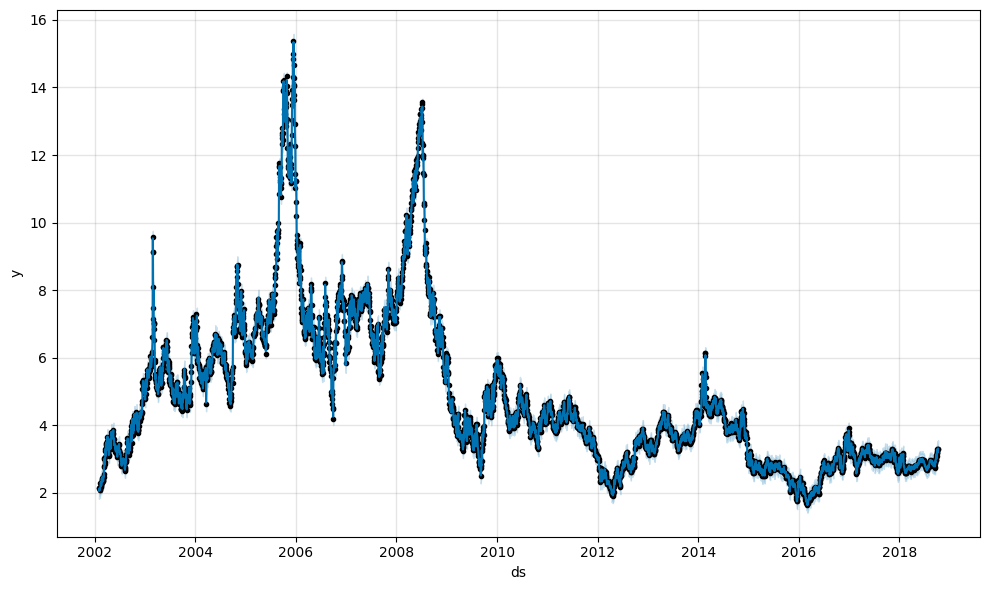

In [25]:
m2.plot(forecast)

In [26]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.99683350


In [27]:
df_test["add1"] = df1['LAG1']
df_test["add2"]= df1['LAG2']
df_test["add3"]= df1['LAG3']
df_test["add4"]=df1['LAG4']
df_test["add5"]=df1['LAG5']
df_test["add6"]= df1['MA5']
df_test["add7"]=df1['MA10']
df_test["add8"]=df1['MA20']

In [28]:
forecast2 = m2.predict(df_test.drop(columns="y"))

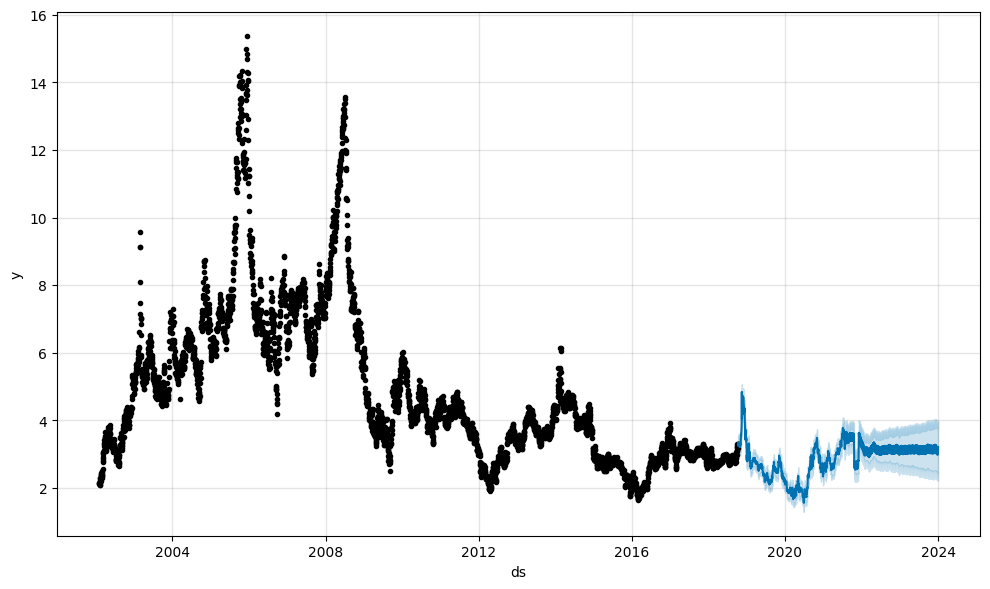

In [29]:
fig=m2.plot(forecast2)

In [30]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.98349182


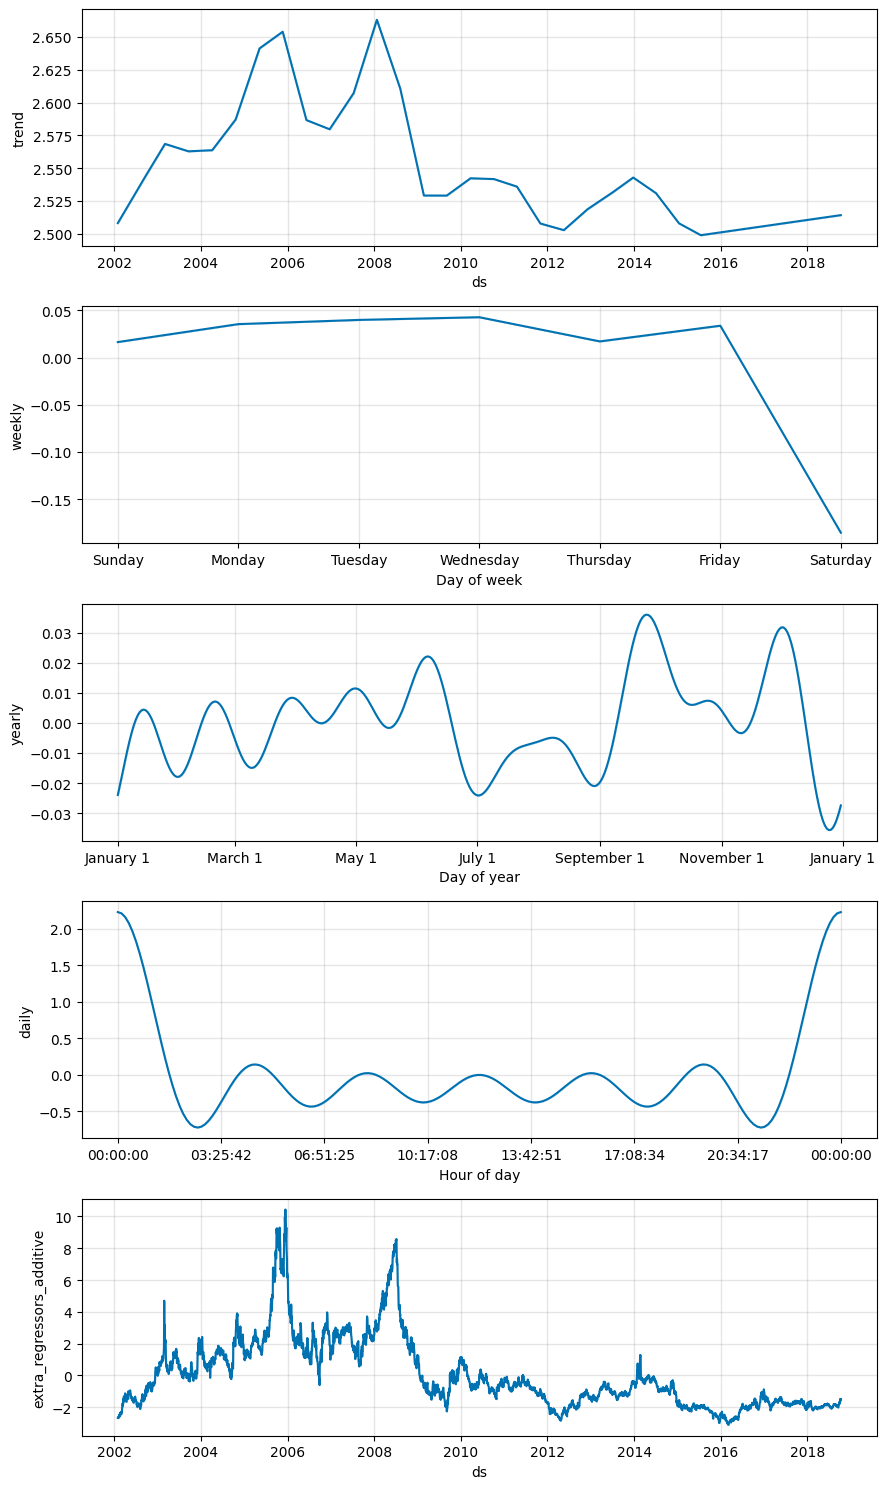

In [31]:
fig2 = m2.plot_components(forecast)

In [32]:
g2=pd.DataFrame(forecast2[['yhat']])
g2.to_csv('C:\\Users\\Document\\Predictions2367.csv')

In [33]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['y'], forecast2['yhat'])
print("Mean Square Error:\n")
print(mse)
rsme = math.sqrt(mse)
print("\nRoot Mean Square Error:\n")
print(rsme)
corr_matrix = np.corrcoef(df_test['y'], forecast2['yhat'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n R Square:\n")
print(R_sq)

Mean Square Error:

0.008550162792740788

Root Mean Square Error:

0.09246709032266986

 R Square:

0.967256159422918
